# QUESTION 2: NUMPY EXERCISE

Submitted by: Arathy Rose Tony  
Roll number: 2018101042

## Question

Consider two sets of points p0 and p1 describing a line in a 2-Dimensional (2D) plane. Consider an arbitrary point p in 2D.

1. Compute the orthogonal distance between the point p and the the line segment joining the points p0 and p1.
2. Plot the line segment joining the points p0 and p1, the point p and the orthogonal distance between the point and the line segment.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
window_size = (-0.25, 1.25)  # window size used

The following function is used to get the representation of the given point p.

In [71]:
def getRep(p):
    return '(' + str(p[0].round(2)) + ',' + str(p[1].round(2)) + ')'

The following function gives at least 2 more points lying on the same line

In [72]:
def getLine(p1, p2):
    a = p1[1] - p2[1]
    b = p1[0] - p2[0]
    if b == 0:
        return np.array([
            p1,
            p2,
            np.array([p1[0], window_size[0]]),
            np.array([p1[0], window_size[1]])
        ])
    elif a == 0:
        return np.array([
            p1,
            p2,
            np.array([window_size[0], p1[1]]),
            np.array([window_size[1], p1[1]])
        ])
    else:
        m = a/b
        c = p1[1] - m * p1[0]
        return np.array([
            p1,
            p2,
            np.array([0, c]),
            np.array([-c/m, 0]),
            np.array([window_size[0], m*window_size[0]+c]),
            np.array([window_size[1], m*window_size[1]+c]),
            np.array([(window_size[0]-c)/m, window_size[0]]),
            np.array([(window_size[1]-c)/m, window_size[1]])
        ])

In [73]:
getLine([2, 2], [4, 4])

array([[ 2.  ,  2.  ],
       [ 4.  ,  4.  ],
       [ 0.  ,  0.  ],
       [-0.  ,  0.  ],
       [-0.25, -0.25],
       [ 1.25,  1.25],
       [-0.25, -0.25],
       [ 1.25,  1.25]])

In [74]:
getLine(np.array([0, 0]), np.array([0, 1]))

array([[ 0.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  , -0.25],
       [ 0.  ,  1.25]])

### Step 1: Generating the points

Here, we use `np.random.rand()` function in order to find the points p1 and p2 (that forms the line) and p (the arbitrary point).

The points generated would be within the square `(0,0), (1,1)`

In [75]:
p = np.random.rand(2)
p0, p1 = np.random.rand(2), np.random.rand(2)

To use non random values for the points, fill them here (and put it as `true`)



In [76]:
if(False):
    p = np.array([0.4, 0.4])
    p0 = np.array([0, 0])
    p1 = np.array([0, 0.4])

Then for display purposes, we convert them into strings

In [77]:
print("The points are ")
print("p  = ", getRep(p))
print("p0 = ", getRep(p0))
print("p1 = ", getRep(p1))

The points are 
p  =  (0.93,0.6)
p0 =  (0.64,0.43)
p1 =  (0.84,0.39)


## Step 2: Finding the foot of the perpendicular from p to p0p1

Here, we use the property that: dot product of two perpendicular vectors is 0.

In [78]:
p0p1 = p1 - p0
p0p = p - p0
foot = p0+np.dot(p0p1, p0p)/np.dot(p0p1, p0p1)*p0p1

## Step 3: Calculating the perpendicular distance

The orthogonal distance between the point p and the the line segment joining the points p0 and p1 is same as the magnitude of the vector joining the point p and the foot of the perpendicular (found in the previous step)

In [79]:
distance = np.linalg.norm(foot - p)
print("The required distance is ", distance)

The required distance is  0.21799960479478975


## Step 4: Plotting the graph
Here, we need to plot

1. line segment joining the points p0 and p1 (`line`)
2. the point p 
3. the orthogonal distance between the point and the line segment (`p_line`)

In [80]:
line = getLine(p0, p1)
p_line = getLine(p, foot)

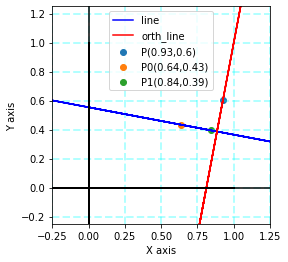

In [81]:
fig = plt.figure()
ax = plt.axes()
plt.grid(b=True, color='aqua', alpha=0.3, linestyle='--', linewidth=2)

plt.plot(line[:, 0], line[:, 1], 'b', label="line")

plt.scatter(p[0], p[1], label='P'+getRep(p))
plt.scatter(p0[0], p0[1], label='P0'+getRep(p0))
plt.scatter(p1[0], p1[1], label='P1'+getRep(p1))

plt.plot(p_line[:, 0], p_line[:, 1], 'r', label="orth_line")

plt.xlabel("X axis")
plt.ylabel("Y axis")

x_axis = getLine(np.array([0, 0]), np.array([1, 0]))
y_axis = getLine(np.array([0, 0]), np.array([0, 1]))
plt.plot(x_axis[:, 0], x_axis[:, 1], 'k')
plt.plot(y_axis[:, 0], y_axis[:, 1], 'k')

plt.axis('square')
ax.set_xlim(window_size)
ax.set_ylim(window_size)

plt.legend()

# A SINGLE FUNCTION TO DO THE REQUIRED OPERATIONS GIVEN 3 POINTS

In [82]:
def get_distance(p0, p1, p):
    p0p1 = p1 - p0
    p0p = p - p0
    foot = p0+np.dot(p0p1, p0p)/np.dot(p0p1, p0p1)*p0p1
    distance = np.linalg.norm(foot - p)
    return distance

In [83]:
def plot(p0, p1, p):
    # finding foot of the perpendicular
    p0p1 = p1 - p0
    p0p = p - p0
    foot = p0+np.dot(p0p1, p0p)/np.dot(p0p1, p0p1)*p0p1
    # finding start and end points of the two lines along with the x and y intercepts
    line = getLine(p0, p1)
    p_line = getLine(p, foot)
    # plot
    fig = plt.figure()

    plt.grid(b=True, color='aqua', alpha=0.3, linestyle='--', linewidth=2)

    plt.scatter(p[0], p[1], label='P '+getRep(p))
    plt.scatter(p0[0], p0[1], label='P0'+getRep(p0))
    plt.scatter(p1[0], p1[1], label='P1'+getRep(p1))

    plt.plot(line[:, 0], line[:, 1], 'b', label="line")
    plt.plot(p_line[:, 0], p_line[:, 1], 'r', label="orth_line")

    x_axis = getLine(np.array([0, 0]), np.array([1, 0]))
    y_axis = getLine(np.array([0, 0]), np.array([0, 1]))
    plt.plot(x_axis[:, 0], x_axis[:, 1], 'k')
    plt.plot(y_axis[:, 0], y_axis[:, 1], 'k')

    plt.xlabel("X axis")
    plt.ylabel("Y axis")

    plt.axis('square')
    # axis
    ax = plt.axes()
    ax.set_xlim(window_size)
    ax.set_ylim(window_size)

    plt.legend()
    plt.show()

In [84]:
get_distance(p0, p1, p)

0.21799960479478975

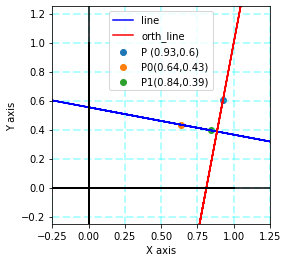

In [85]:
plot(p0, p1, p)